*There are no recommended prerequisites for this notebook.*

In [ ]:
# package imports (SHIFT + ENTER to run)
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Callable

# dev note : add solutions
# dev note : proof reading

# Stellar remnants and dark matter

This notebook is **part 3** of an introductory bundle, meant to be consumed sequentially according to this outline:

<h3>Contents</h3>

- [What is microlensing?](Introduction.ipynb#what-is-microlensing) ([part 1](Introduction.ipynb))

- [What is it used for?](Introduction.ipynb#what-is-it-used-for)

  - [Exoplanets](PlanetsAndBrownDwarfs.ipynb#exoplanets) ([part 2](PlanetsAndBrownDwarfs.ipynb))

  - [Brown dwarfs](PlanetsAndBrownDwarfs.ipynb#brown-dwarfs)

  - [Black holes and other remnants](#black-holes-and-other-remnants) (part 3)

  - [Dark matter](#dark-matter)

  - [The Macho project](#the-macho-project)
  
- [Microlensing eras (part 4)](Era.ipynb)

  - [Past](Era.ipynb)

  - [Present](Era.ipynb)
  
  - [Future](Era.ipynb)

## Black holes and other remnants



A black hole is a densely packed object for which the gravitational force from its mass exceeds all other outward forces (hydrostatic pressure, electron degeneracy pressure, repulsive nuclear force, and neutron degeneracy pressure). The result is a gravitational well with an event horizon beyond which even light cannot escape. Stellar-mass black holes are the direct remnants of very-high-mass stars ($40-140\,M_\odot$ and $>260\,M_\odot$; [Heger et al., 2003](https://ui.adsabs.harvard.edu/abs/2003ApJ...591..288H)), after they run out of fuel. Their masses are expected to be greater than $3\,M_\odot$. Black holes can also form from neutron stars.<sup>\*<sub>1,2</sub></sup> Despite no longer undergoing fusion in their cores, the high temperatures of neutron stars and white dwarfs at their formation mean that they will still radiate light, if dimly, until they have completely cooled. This cooling is expected to take place on timescales on the order of the age of the universe; no remnants are expected to have completely cooled.<sup>\*<sub>3</sub></sup> Because of their luminous nature, $\sim10,000$ white dwarfs (e.g., [Inight et al., 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.525.3597I) and [Inight et al., 2023](https://ui.adsabs.harvard.edu/abs/2023MNRAS.525.3597I)) have been observed in our galaxy. Neutron stars have only been directly observed for very close objects (e.g., [Posselt et al., 2017](https://ui.adsabs.harvard.edu/abs/2017ApJ...835...66P); [Heger et al., 2003](https://ui.adsabs.harvard.edu/abs/2003ApJ...591..288H)). Thousands of neutron star detections have resulted from observations of the jets from the poles of neutron stars or through indirect means, as part of exotic binaries. Given the light-trapping nature of black holes, microlensing may prove invaluable for understanding the characteristics of the remnant population, particularly in exploring the mass gap between low-mass black holes and high-mass neutron stars ($2.35-3\,M_\odot$).

> <sup>*<sub>1</sub></sup> <i>Neuron stars</i> are stellar remnants for which neutron degeneracy pressure and repulsive nuclear forces support the object's mass. They have been observed with masses between $1.4$ and $2.35\, M_\odot$ (e.g., [Cromartie et al., 2020](https://ui.adsabs.harvard.edu/abs/2020NatAs...4...72C) and [Romani et al., 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...934L..17R)).

> <sup>*<sub>2</sub></sup> <i>White dwarfs</i> have masses below $\sim1.4\,M_\odot$, with electron degeneracy pressure opposing their gravitational force and preventing further collapse.

> <sup>*<sub>3</sub></sup> [Avila et al. (2023)](https://ui.adsabs.harvard.edu/abs/2023ApJ...000..000A) investigates the potential for asymmetric fermionic dark matter, accumulated in the core of stars, to alter this expected cooling behaviour.

| ![](./Assets/SMBH.jpg)|
| :-: |
| Size comparison of the two black holes imaged by the Event Horizon Telescope (EHT) Collaboration: M87*, at the heart of the galaxy Messier 87, and Sagittarius A* (Sgr A*), at the centre of the Milky Way. The image shows the scale of Sgr A* in comparison with both M87* and other elements of the Solar System such as the orbits of Pluto and Mercury. Also displayed is the Sun’s diameter and the current location of the Voyager 1 space probe, the furthest spacecraft from Earth. M87*, which lies 55 million light years away, is one of the largest black holes known. While Sgr A*, 27 000 light-years away, has a mass roughly four million times the Sun’s mass, M87* is more than 1000 times more massive. Because of their relative distances from Earth, both black holes appear the same size in the sky. Available from: [www.eso.org](https://www.eso.org/public/images/eso2208-eht-mwe/) [Accessed 27 January, 2024]. **Credit:** EHT collaboration **Acknowledgment:** Lia Medeiros, [xkcd](https://xkcd.com/2135/). |

Black holes have been directly observed, in the form of AGNs at the centre of our galaxy (Sagattarius A*) and the centre of Messier 87 (Messier 87*),<sup>\*<sub>4</sub></sup> using the Event Horizon Telescope ([Doeleman et al., 2009](https://ui.adsabs.harvard.edu/abs/2009astro2010S..68D); [Event Horizon Telescope Collaboration et al., 2023](https://ui.adsabs.harvard.edu/abs/2019ApJ...875L...1E)). Such objects have truly enormous shadows and heat the mass in their surrounding accretion disk enough to be visible in radio frequencies, as demonstrated in the figure above. These hungry hippos at the centre of galaxies differ from our general expectation of black holes because, after their formation, they are thought to have continued to consume large amounts of surrounding matter until they have become many orders of magnitude more massive than a typical stellar black hole. Their endless mass buffet is a product of their central location in their host galaxy, and as such, Sagittarius A* is thought to be the one and only super-massive black hole in our galaxy, with a mass of $4.3\times10^6,M_\odot$ ([Gravity Collaboration et al., 2023](https://ui.adsabs.harvard.edu/abs/2023A&A...677L..10G)). However, there are predicted to be $10^7$ - $10^9$ stellar-mass black holes in the Milky Way ([Shapiro et al., 1983](https://ui.adsabs.harvard.edu/abs/1983bhwd.book.....S); [Timmes et al., 1996](https://ui.adsabs.harvard.edu/abs/1996ApJ...457..834T); [Samland et al., 1998](https://ui.adsabs.harvard.edu/abs/1998ApJ...496..155S); [Agol et al., 2002](https://ui.adsabs.harvard.edu/abs/2002ApJ...576L.131A); [Satore et al., 2010](https://ui.adsabs.harvard.edu/abs/2010A&A...523A..33S)).

> <sup>*<sub>4</sub></sup> These are the two largest known black holes by angular size, as viewed from Earth.

Dozens of other black holes have been detected in the Milky Way, through indirect means: dynamical mass measurements ([Corral-Santana et al., 2016](https://ui.adsabs.harvard.edu/abs/2016A&A...587A..61C); [Thompson et al., 2019](https://ui.adsabs.harvard.edu/abs/2019Sci...366..637T)) and microlensing.<sup>\*<sub>5</sub></sup> The black holes found through dynamical mass measurement were all in binaries, as a requirement of them being able to be detected. However, it is believed that black holes predominantly exist in singular form ([Belczynski et al., 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...608L..45B); [Fender et al., 2013](https://ui.adsabs.harvard.edu/abs/2013MNRAS.432..620F); [Wiktorowicz et al., 2019](https://ui.adsabs.harvard.edu/abs/2019ApJ...885..47W)), making this sample a poor representation of the population. Again, microlensing, as the only available method for measuring the masses of isolated Milky-Way black holes, holds a unique position in terms of the populations that it can sample and thereby constrain the characteristics of [Zaris et al., 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...899..123Z).

> <sup>\*<sub>5</sub></sup> Outside the Milky Way, many more black hole mergers have been detected through gravitational wave signals, with object masses from around $3-100\, M_\odot$, spanning from the NS/black hole mass gap to lower intermediate-mass black holes [Abbott et al., 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...892L...3A).

Those black holes of intermediate mass and lower have angular scales of far more plausible sizes for observations using microlensing. The difficulty at the high-$\theta_{\rm E}$ end of detectability is that the timescales for theses events begins to overlap observing seasons and the configurations of neighbouring stars change as objects move, which means the amount of contaminating light becomes noticeably variable. While free-floating planet-lens events last **hours to days**, brown dwarf-lens events span **days to weeks**, and black hole lensing events can persist for **years**. The Exercise below is intended to make clear the scale of this escalation in $\theta_{\rm E}$ and thus likely event duration. 

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/RemnantsE1.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 1</h2>
    </a>
    <p style="margin: 0 20px;">Use the sliders to change the mass, distances, and proper motion of the lens. 
The Einstein radius, crossing time, and animation will update accordingly.</p>
    <br>
</div>


In [2]:
def theta_E(M: float, Dl: float, Ds: float) -> float:  # this is a function definition with a type hint
    """
    Calculate the Einstein radius of a lensing system.

    Parameters
    ----------
    M : float
        Mass of the lens in solar masses
    Dl : float
        Distance to the lens in kpc
    Ds : float
        Distance to the source in kpc
    
    Returns
    ----------
    float
        Einstein radius in arcseconds
    
    Notes
    ----------
    The Einstein radius is calculated as:
    ``` math::
    theta_E = sqrt(4 * G * M / c^2 * (1.0 / Dl - 1.0 / Ds)
    ```
    where
    - G is the gravitational constant
    - M is the mass of the lens
    - c is the speed of light
    - Ds is the distance to the source
    - Dl is the distance to the lens.
    """
    
    # Constants
    kappa = 8.144  # mas/M_Sun
    #kappa_mu = kappa*1000  # muas/M_Sun
    #as2muas = 1.0*1000000.0  # 1 as in muas
    as2mas = 1.0*1000.0  # 1 as in mas

    # Calculate Einstein radius
    pirel_as = (1./(Dl*1000)-1.0/(Ds*1000))
    pirel_mas = pirel_as*as2mas
    #pirel_muas = pirel_as*as2muas
    #print(pirel_as, pirel_muas)
    return np.sqrt(kappa * M * pirel_mas)

In [3]:
import numpy as np
import ipywidgets as widgets
from IPython.display import display, Image
import sys

# Add animations module to path
sys.path.append('../Modules/')
from AnimatedEvent import create_lens_animation

# Function definition (using theta_E from the previous cell)
def theta_E(M, Dl, Ds):
    kappa = 8.144  # mas/M_sun
    as2mas = 1000.0  # 1 as in mas
    pirel_as = (1.0 / (Dl * 1000) - 1.0 / (Ds * 1000))
    pirel_mas = pirel_as * as2mas
    return np.sqrt(kappa * M * pirel_mas)

# Slider styles
slider_style = {'description_width': '150px'}  # Set the width of the description textboxes
slider_layout = widgets.Layout(width='500px')  # Set the width of the slider bars

# Slider widgets with styling
mass_slider = widgets.FloatLogSlider(
    value=1.0, base=10, min=-2, max=6, step=0.1,
    description='Lens Mass (M_sun):', continuous_update=False,
    style=slider_style, layout=slider_layout
)
lens_distance_slider = widgets.FloatSlider(
    value=2.0, min=0.1, max=50.0, step=0.1,
    description='Lens Distance (kpc):', continuous_update=False,
    style=slider_style, layout=slider_layout
)
source_distance_slider = widgets.FloatSlider(
    value=8.0, min=0.5, max=50.0, step=0.1,
    description='Source Distance (kpc):', continuous_update=False,
    style=slider_style, layout=slider_layout
)
proper_motion_slider = widgets.FloatSlider(
    value=5.0, min=1.0, max=10.0, step=0.1,
    description='Proper Motion (mas/yr):', continuous_update=False,
    style=slider_style, layout=slider_layout
)

# Output display
output = widgets.Output()

# Function to update results and animation
def update_results(change=None):
    with output:
        output.clear_output()
        M = mass_slider.value
        Dl = lens_distance_slider.value
        Ds = source_distance_slider.value
        mu = proper_motion_slider.value

        if Ds <= Dl:
            print("⚠️ Warning: Source distance (D_s) must be greater than lens distance (D_l).")
        else:
            theta_E_val = theta_E(M, Dl, Ds)
            t_E = theta_E_val / mu
            print(f"Einstein radius (theta_E): {theta_E_val:.4f} mas")
            print(f"Einstein crossing time (t_E): {t_E:.4f} years")

            # **Regenerate the animation with updated values**
            create_lens_animation(M, mu, Dl, Ds)

            # **Display the updated GIF**
            display(Image("./Assets/lens_animation.gif", width=400))

# Attach update function to sliders
mass_slider.observe(update_results, names='value')
lens_distance_slider.observe(update_results, names='value')
source_distance_slider.observe(update_results, names='value')
proper_motion_slider.observe(update_results, names='value')

# Display widgets and results
display(mass_slider, lens_distance_slider, source_distance_slider, proper_motion_slider, output)

# Trigger initial update (runs once at start)
update_results()

FloatLogSlider(value=1.0, continuous_update=False, description='Lens Mass (M_sun):', layout=Layout(width='500p…

FloatSlider(value=2.0, continuous_update=False, description='Lens Distance (kpc):', layout=Layout(width='500px…

FloatSlider(value=8.0, continuous_update=False, description='Source Distance (kpc):', layout=Layout(width='500…

FloatSlider(value=5.0, continuous_update=False, description='Proper Motion (mas/yr):', layout=Layout(width='50…

Output()

[Abrams et al., 2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...000..000A) propose a 10-year effort to observe such events using the Vera C. Rubin Observatory (formerly the Large Synoptic Survey Telescope, LSST; [Ivezic et al., 2008](https://ui.adsabs.harvard.edu/abs/2008arXiv0805.2366I)). They expect, given an observing pool of $2\times10^{10}$ bulge stars,

However, after 30 years of rigorous searching, to date, definitive characterisation has been achieved for two microlensing black holes. THe first being OGLE-2011-BLG-0462/MOA-2011-BLG-191. [Lam et al., 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...000..000L) and [Lam et al., 2023](https://ui.adsabs.harvard.edu/abs/2023ApJ...000..000L) present their initial photometric and astrometric<sup>*<sub>5</sub></sup> models and a subsequent reanalysis. [Sahu et al., 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...000..000S) simultaneously and independently presented their modelling, which was in agreement with the reanalysis [Lam et al., 2023](https://ui.adsabs.harvard.edu/abs/2023ApJ...000..000L). The higher mass determined in [Sahu et al., 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...000..000S) and [Lam et al., 2023](https://ui.adsabs.harvard.edu/abs/2023ApJ...000..000L) was verified in the x-ray follow-up of [Mereghetti et al., 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...000..000M). They measured the x-ray luminosity for this object and found it to be consistent with the radiative efficiency expected from a black hole, disfavouring an neutron star characterisation (i.e., [Lam et al., 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...000..000L)). The timescale for this event was $270\, \rm{days}$ and the agreed upon mass was around $6-7\, M_\odot$; conclusively in the black hole mass regime.

The second microlensing black hole discovery was an unambiguous detection of an isolated 7.15 solar mass black hole (BH) (OGLE-2011-BLG-0462; [Sahu et a;, 2025](https://arxiv.org/abs/2503.07820)). By analyzing astrometric deflections measured over 11 years with the Hubble Space Telescope (HST), the researchers determined the lensing object is located about 1.52 kiloparsecs away. The absence of detectable light from the lens confirms its BH nature. 

Constraining black hole population characteristics will be a slow process, given the time it takes to observe these events, but the current state of microlensing black hole research demonstrates the generality of microlensing as a tool for the luminosity-independent exploration of objects of wildly varying mass and inferring population characteristics on a galactic scale. 

## Dark matter
The other non-luminous elephant in the room is dark matter. Gravitational lensing has already proven its usefulness at "observing" diffuse collections of dark matter, as in the case of the [Bullet Cluster](https://en.wikipedia.org/wiki/Bullet_Cluster) (below), but detecting it using microlensing is more of a challenge. 

| The Bullet Cluster |
| :-: |
| <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/1e0657_scale.jpg/600px-1e0657_scale.jpg" alt="The Bullet Cluster" width="560"/> |
| Composite image showing the galaxy cluster [1E 0657-56](https://chandra.harvard.edu/photo/2006/1e0657/more.html), better known as Bullet Cluster. The image in background showing the visible spectrum of light stems from Magellan and Hubble Space Telescope images. The pink overlay shows the x-ray emission (recorded by Chandra Telescope) of the colliding clusters, the blue one represents the mass distribution of the clusters calculated from gravitational lens effects. Scale: Full image is 7.5 arcmin wide, 5.4 arcmin high. **Credit:** [NASA](http://www.nasa.gov/)/[CXC](https://cxc.harvard.edu/)/[Chandra X-Ray Observatory](https://chandra.harvard.edu/) **Acknowledgment:** M. Weiss |
        
Microlensing is a fine-grain tool compared to large-scale lensing, and finding specific kinds of events takes a concerted effort, with tailored observing and data processing strategies. Microlensing surveys are oriented toward the bulge because it provides densely populated images, increasing the chance of transient alignment events, and the distance scales are compatible with the detection of lenses with masses ranging from planetary to stellar. For example, if we wanted to search for black holes on a much shorter time frame, with event timescales on the order of days to months, we would want to look for these objects at lens and source distance more like $1000\,\rm{kpc}$, which is to say in other galaxies in the local group, introducing a plethora of new observing challenges. Therefore, observing dark matter with microlensing requires some knowledge or theories about what it is.

Dark matter is thought to interact with ordinary matter (matter composed of protons, neutrons, and electrons) through gravitational force, but not emit light or interact electromagnetically. 

### Why do we need it?
Dark matter is necessary to explain the collapse of the fairly homogeneous gas of the early universe, to progressively bigger clumps. This homogeneity is demonstrated by the Cosmic Microwave Background (CMB), which has density variations on the order of $10^{-5}$ [(Plank Collaboration, 2016)](https://ui.adsabs.harvard.edu/abs/2016A&A...594A...1P). For the majority of its first $\sim300\,000$ years, the universe was a big photon-baryon soup. In the very early universe, quantum fluctuations created potential hills and wells, which were stretched onto cosmic scales during the rapid expansion period. These potential wells drew in material, but photon pressure in the baryon-photon fluid resisted this compression, resulting in oscillations. These oscillating pressure waves are known as baryonic acoustic oscillations and are responsible for the density landscape of the current universe; when the universe had cooled enough for atoms to form ([recombination](https://en.wikipedia.org/wiki/Recombination_(cosmology))), the baryon-photon fluid released photons (first light, now observed as the CMB) and the pressure waves froze as they were. Dark matter acted to deepen the potential wells (gravitationally attracting material, but without the photon pressure forcing it to oscillate), which affected the acoustic oscillations. The specific manner in which the oscillations are predicted to be affected is supported by observed temperature variations in the CMB [Hu, 2000](https://ui.adsabs.harvard.edu/abs/2000Natur.404..939H).

> <i>These effects and processes are well explained in [Wayne Hu's Intermediate Guide to the Acoustic Peaks and Polarization](http://background.uchicago.edu/~whu/intermediate/intermediate.html). </i>
     
<h5> <i>"Diffusion damping during recombination is expected to wipe out all small-scale structure in baryons, preventing the formation of galaxies at late times. Dark matter, however, can sustain structure during the damping regime, and will seed the formation of galaxies" </i> <a href="https://ui.adsabs.harvard.edu/abs/2012PhR...513....1C"> - Clifton et al. (2020)</a> </h5>

Dark matter is also used to explain the rotation curves we see in galaxies ([Linbald, 1927](https://ui.adsabs.harvard.edu/abs/1927MNRAS..87..553L); [Babcock, 1939](https://ui.adsabs.harvard.edu/abs/1939LicOB..19...41B); and [Oort, 1940](https://ui.adsabs.harvard.edu/abs/1940ApJ....91..273O)). The expectation, from the density of luminous matter in galaxies, is for decreasing rotational velocity with radius (beyond the solid body rotation at the centre). However, observations of galaxies and clusters have consistently flat rotation curves ([Rubin & Ford, 1970](https://ui.adsabs.harvard.edu/abs/1970ApJ...159..379R)). Our current understanding of dark matter's role in Galactic structure is that it exists in a roughly spherical "halo" ([Navarro, Frenk, & White, 1996](https://ui.adsabs.harvard.edu/abs/1996ApJ...462..563N); see also, [**NFW Profile**](https://en.wikipedia.org/wiki/Navarro%E2%80%93Frenk%E2%80%93White_profile)), while the normal, radiative, star-forming gas collapses into a disk. This explains the flat rotation curves that we observe in galaxies because the mass is not concentrated in the Galactic centre. 

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/RemnantsE2.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 2</h2>
    </a>
    <p style="margin: 0 20px;">In this exercise, you will compute the total mass of dark matter enclosed within 50 kpc of the Galactic centre, assuming the dark matter halo follows a simple Navarro–Frenk–White (NFW) density profile. The NFW function is provided. Your task is to perform a numerical integration to calculate the enclosed mass.</p>
    <br>
    <p style="margin: 0 20px;">
    <i>Note. Consider using scipy.integrate.quad</i>
    <br>
    <i>Note. McMillan (2017) and <a href="https://ui.adsabs.harvard.edu/abs/2002ApJ...573..597K/abstract">Klypin et al. (2002)</a> discuss Milky Way–like halo models that typically yield an enclosed mass in the ballpark of a few times 10<sup>11</sup> M<sub>&#x2299;</sub>, within 50 kpc.
    </p>
    <br>
</div>



In [4]:
def nfw_density(r, rho0=9.65e6, rs=16.67):
    """
    Compute the Navarro–Frenk–White (NFW) density profile.

    The NFW profile describes the density distribution of dark matter halos
    and is given by the formula:

    .. math::
         \\rho(r) = \\frac{\\rho_0}{(r/r_s)\\,(1 + r/r_s)^2}

    Parameters
    ----------
    r : float or array_like
        Radial distance(s) from the halo centre (in kiloparsecs, kpc).
    rho0 : float, optional
        Characteristic density (in units of M_sun/kpc^3). Default is 9.65e6.
        (This value is chosen as a typical normalization; adjust as needed.)
    rs : float, optional
        Scale radius (in kpc). Default is 16.67 kpc.

    Returns
    -------
    rho : float or ndarray
        The density at radius r (in M_sun/kpc^3).

    Notes
    -----
    The NFW profile was proposed by Navarro, Frenk, and White (1997) as an
    empirical description of dark matter halos formed in cold dark matter
    simulations.

        Navarro, J. F., Frenk, C. S., & White, S. D. M. (1997). 
        A Universal Density Profile from Hierarchical Clustering.
        *The Astrophysical Journal, 490*(2), 493–508.
    
    Ensure that the units for r, rho0, and rs are consistent.
    """
    r = np.asarray(r)
    x = r / rs
    return rho0 / (x * (1.0 + x)**2)

def rho_crit(H=70.4):
    """
    Calculate the critical density of the Universe.

    The critical density of the Universe is given by the formula:

    .. math::
        \\rho_{\\text{crit}} = \\frac{3 H^2}{8 \\pi G}

    Parameters
    ----------
    H : float, optional
        The Hubble constant (in km/s/Mpc). Default is 70.4 from Komatsu et al. (2011).

    Returns
    -------
    rho_crit : float
        The critical density of the Universe (in M_sun/kpc^3).

    Notes
    -----
    The critical density is the threshold density required for the Universe
    to be spatially flat. It is also used to define the dimensionless density
    parameters Omega_m and Omega_Lambda.
    """
    G = 4.302e-6  # Gravitational constant in kpc/M_sun/(km/s)^2
    H = H * 1e-3  # Convert Hubble constant to 1/kpc
    return 3.0 * H**2 / (8.0 * np.pi * G)

rho_crit()


def rho_s(R_virial=200, c=12):
    """
    Calculate the characteristic density of a halo.

    The characteristic density of a halo is given by the formula:

    .. math::
        \\rho_s = \\frac{M_{\\text{virial}}}{(4 \\pi R_{\\text{virial}}^3) \\times f(c)}

    where f(c) is a function of the halo concentration parameter c.

    Parameters
    ----------
    R_virial : float
        Virial radius of the halo (in kpc). Default is 200 kpc (e.g. Klypin et al. 2002).
    c : float
        Concentration parameter of the halo. Typically 10-15 (Dutton & Macciò (2014). 
        Default 12 (e.g. Klypin et al., 2002 and McMillan, 2017).

    Returns
    -------
    rho_s : float
        The characteristic density of the halo (in M_sun/kpc^3).

    Notes
    -----
    The characteristic density is a key parameter in the Navarro-Frenk-White
    (NFW) density profile, which describes the density distribution of dark
    matter halos. The concentration parameter c is defined as the ratio of
    the virial radius to the scale radius of the halo.
    """
    M_virial = (4.0 / 3.0) * np.pi * R_virial**3 * 200 * rho_crit()  # note the factor of 200
    # Average density inside R_virial:
    avg_density = M_virial / (4.0 * np.pi * R_virial**3)
    # f(c) = ln(1+c) - c/(1+c)
    f_c = np.log(1.0 + c) - c / (1.0 + c)
    return avg_density * (c**3) / f_c

rho_s_for_lowest_reasonable_mass = rho_s(c=10)
print(f"Characteristic density for a halo with c=10: {rho_s_for_lowest_reasonable_mass:.2e} M_sun/kpc^3")
rs_for_lowest_reasonable_mass = 200/10
print(f"Scale radius for a halo with c=10: {rs_for_lowest_reasonable_mass:.2f} kpc")


Characteristic density for a halo with c=10: 6.16e+06 M_sun/kpc^3
Scale radius for a halo with c=10: 20.00 kpc


In [5]:
# Numerical integration for the mass inside 50 kpc.
######################
# Your code goes here

######################

Dark matter is also necessary to explain the velocity dispersions we see in galaxy clusters ([Zwicky, 1933](https://ui.adsabs.harvard.edu/abs/2009GReGr..41..207Z)).

Dark matter is not a necessary part of the standard model of particle physics and cannot be described without extension to the standard model. Dark matter is entirely superfluous given our current understanding of particle physics. The existence of dark matter is entirely supported by astrophysical observations that do not match our models.

### What is it?
There have been many proposed particle-physics solutions put forward to solve this astrophysical problem. Dark matter has been proposed in the form of exotic particles, such as [WIMPs (Weakly interacting massive particles)](https://en.wikipedia.org/wiki/Weakly_interacting_massive_particle), [axions](https://en.wikipedia.org/wiki/Axion), and [sterile neutrinos](https://en.wikipedia.org/wiki/Sterile_neutrino). However, searches for these exotic particles have been largely fruitless (see, for example, the following review articles: [Peter, 2012](https://ui.adsabs.harvard.edu/abs/2012arXiv1201.3942P); [Profumo, Giani, & Piattella, 2019](https://ui.adsabs.harvard.edu/abs/2019Univ....5..213P)).

Another proposed solution to the dark matter problems is modified Newtonian dynamics ([MOND](https://en.wikipedia.org/wiki/Modified_Newtonian_dynamics); [Milgrom, 1983](https://ui.adsabs.harvard.edu/abs/1983ApJ...270..365M)), which postulates that this issue with rotation curves is not with our understanding of the composition of galaxies, but instead with our understanding of gravity at large distances. MOND described the gravitational force, beyond some acceleration limit, $a_0$, to be decreasing proportional to inverse radius as opposed to the inverse square radius of Newtonian dynamics. The theories developed to marry MOND with general relativity are collectively termed modified gravity (summarised in [Clifton et al., 2012](https://ui.adsabs.harvard.edu/abs/2012PhR...513....1C)). Arguments against modified gravity basically reduce to their mathematical formulations being phenomenological. Conversely, an oversimplification of arguments against general relativity being complete, and particle dark matter necessary, are the density model inconsistencies from cosmological to galactic scales (i.e., the cusp/core problem; [Del Popolo & Le Delliou, 2022](https://ui.adsabs.harvard.edu/abs/2022arXiv220914151D)).

This [video](https://www.youtube.com/watch?v=HJ8F0pfNTgM) explains how recent observations from [JWST](https://en.wikipedia.org/wiki/James_Webb_Space_Telescope) have created a resurgence in MONDs popularity.

<img align=left src="./Assets/MOND_GoogleTrends.png" alt="GoggleTrend results for MOND" width="450"/>
<p align=right>
<iframe width="560" height="315" src="https://www.youtube.com/embed/HJ8F0pfNTgM" title="Has JWST shown that dark matter doesn’t exist?" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>
</p> 


Astrophysical suggestions for dark matter include primordial black holess and Massive Astrophysical Compact Halo Objects ([MACHOs](https://en.wikipedia.org/wiki/Massive_compact_halo_object)). MACHOs are meant to include all dim astrophysical bodies, which may or may not be composed of baryonic matter: primordial black holes,<sup>*<sub>1</sub></sup> FFPs, brown dwarfs, neutron stars, white dwarfs, and black holes. Determining the prominence of these objects in the Galactic Halo was the primary science goal of the MACHO Collaboration ([Alcock et al., 1993](https://ui.adsabs.harvard.edu/abs/1993Natur.365..621A)). 

> <sup>*<sub>1</sub></sup> <i>Primordial black holes</i> are a theorised (in [Zel'dovich & Novikov, 1966](https://ui.adsabs.harvard.edu/abs/1966AZh....43..758Z)) type of black hole that are meant to have formed in the first moments of the universe, when it was between $10^{-36}\,\rm{s}$ and $10^{-32}\,\rm{s}$ old. Those with masses of $10^{12}\,\rm{kg}$ to thousands of solar masses would have survived (and not evaporated via Hawking radiation) to the current age of the universe ([Carr et al., 2010](https://ui.adsabs.harvard.edu/abs/2010PhRvD..81j4019C) and [Wang et al., 2021](https://ui.adsabs.harvard.edu/abs/2021PhRvD.103d3010W)).
        
The underlying assertion behind astrophysical explanations for dark matter is that the problem is with our population models, not with our understanding of matter. The bonus to this interpretation is that one does not have to solve all of the problems that indicate the existence of dark matter at once because they are born of different models.  For example, MACHOs could explain the problem with the rotation curves of galaxies, but have no bearing on baryonic acoustic oscillations in the early universe.

## The MACHO project
If MACHOs are responsible for the rotation curve of our galaxy, then source stars in the [Magellanic clouds](https://en.wikipedia.org/wiki/Magellanic_Clouds)<sup>*<sub>2</sub></sup> have an approximately $10^{-6}$ probability of undergoing strong lensing on a microlensing scale ([Paczynski, 1986](https://ui.adsabs.harvard.edu/abs/1986ApJ...304....1P)). The early microlensing surveys concentrated on SMC and LMC pointings because the number of stars in the SMC and LMC brought the probability of lensing events occurring up to reasonable levels, the line of sight is dominated by "halo" space, and the range of possible lens and source distances allowed for a large range of mass sensitivities ($10^{-7}\,M_\odot$ to $100\,M_\odot$; [Griest, 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...366..412G)). They also recognised early on the benefits of bulge-directed observations, for their higher predicted event rate, for finding disk dark matter and probing the low-mass end of the stellar mass function ([Paczynski, 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...371L..63P), [Griest et al., 1991](https://ui.adsabs.harvard.edu/abs/1991ApJ...372L..79G)). 

> <sup>*<sub>2</sub></sup> <i>The small Magellanic cloud (SMC) and large Magellanic cloud (LMC) dwarf galaxies orbiting the [Milky Way](https://en.wikipedia.org/wiki/Milky_Way). They have apparent sizes (in V band) of $11\times9\,{\rm deg}$ and $5\times3\,{\rm deg}$, and are located at $({\rm RA},{\rm Dec})=(05^{\rm h}\, 23^{\rm m}\,34^{\rm s}, -69^o \, 45.4')$ and $({\rm RA},{\rm Dec})=(00^{\rm h}\, 53^{\rm m}\,44.8^{\rm s},-72^o \, 49'\,43'')$, respectively.</i>

The microlensing contribution to this dark-matter story are well summarised in [*"Three decades of the OGLE survey"*](https://www.astro.sk/caosp/Eedition/FullTexts/vol54no2/pp234-248.pdf) ([Soszynski, 2024](https://ui.adsabs.harvard.edu/abs/2024CoSka..54b.234S)). But, suffice it to say that the number of halo lensing events did not meet the expectations set by a MACHO-dark-mater model. This is summarised in the findings of [Mroz et al. (2024)](https://ui.adsabs.harvard.edu/abs/2024arXiv240302398M);  in 20 years, there have been 13 event detections facing the LMC, all of which could plausibly be explained by disk or LMC lens stars. They conclude that MACHOs in the mass range of $1.3\times10^{-5}\,M_\odot\lesssim M\lesssim860\,M_\odot$, could, at most, explain 10% of the dark-matter budget.

The community fairly quickly pivoted their attention to leveraging microlensing for exoplanet studies ([Sackett, 1997](https://ui.adsabs.harvard.edu/abs/1997astro.ph..9269S)). While the first LMC directed lensing event was detected in 1993 ([Alcock et al., 1993](https://ui.adsabs.harvard.edu/abs/1993Natur.365..621A)), the first conclusive planetary-companion binary lens was OGLE 2003-BLG-235/MOA 2003-BLG-53 ([Bond et al., 2004](https://ui.adsabs.harvard.edu/abs/2004ApJ...606L.155B)).

The unexpected large number of microlensing FFPs resulted in a brief resurgence in the idea of MACHO dark matter (specifically the idea that the FFPs may be msidiagosed, Earth-mass, promordial black holes; [Niikura, 2019](https://arxiv.org/abs/1901.07120)) that was ultimately quelled by dedicated, higher-cadence survey observations of the Magellanic clouds by the OGLE team ([Mroz et al., 2024](https://ui.adsabs.harvard.edu/abs/2024ApJ...976L..19M))

<div style="background-color:#e0e0e0; 
    border-left: 8px solid #808080; 
    padding: 10px 0 10px 20px; 
    margin: 20px 5px; 
    box-sizing: border-box"> <a href="./Exercises/RemnantsE3.txt">
    <h2 style="color: #808080; font-size: 24px;">Exercise 3</h2>
    </a>
    <p style="margin: 0 20px;">If we assume that brown dwarfs and FFPs form through core accretion processes, then they should naturally belong on a continuous stellar mass function. In this exercise, we have constructed a mass function for dark halo objects based on several sweeping - and arguably generous - assumptions that tend to overestimate their mass contribution.<br>Your task is to swap out the FFP mass functions provided and analyze how these changes affect the fraction of local dark matter that can be explained by MACHOs. This will help determine if these dark objects could, in principle, account for the dark matter required to explain the Milky Way’s rotation curve.</p>
    <br>
</div>

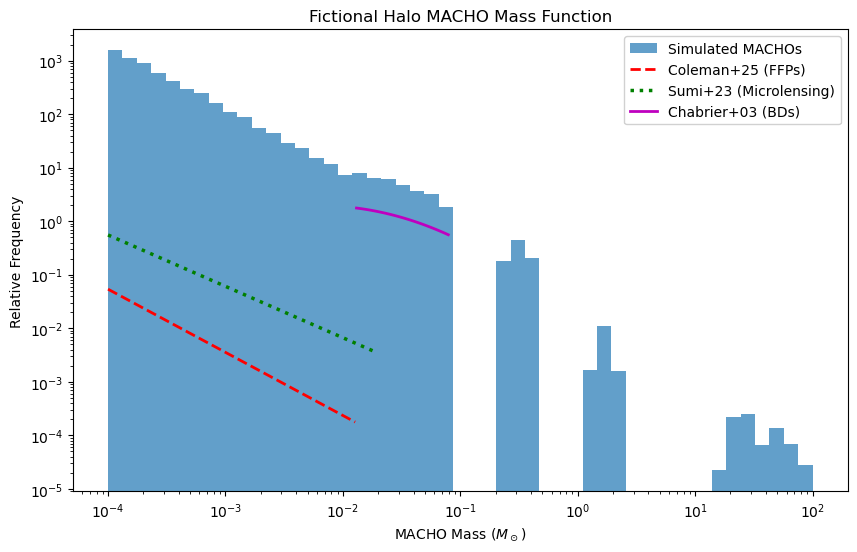

In [6]:
# Constants
M_JUP_TO_M_SUN = 9.54e-4  # 1 Jupiter mass in solar masses
M_EARTH_TO_M_SUN = 3.003e-6  # 1 Earth mass in solar masses

def ffp_mass_function_Coleman25(M: np.ndarray) -> np.ndarray:
    """
    Coleman & DeRocco (2025) FFP mass function (Fig. 2 features).

    Parameters
    ----------
    M : np.ndarray
        Mass array in solar masses.

    Returns
    -------
    np.ndarray
        dN/dlogM (planets per star per dex).

    Notes
    -----
    - Peak at ~8 M⊕ (1e-5 Msun) from circumbinary ejections
    - Trough at ~1 M⊕ (3e-6 Msun) due to collision dominance
    - Power-law at low masses from planet-planet scattering
    Based on Coleman & DeRocco (2025) simulations (attached PDF).
    """
    M_earth = M / M_EARTH_TO_M_SUN
    result = np.zeros_like(M)
    
    # Super-Earth peak (8 M⊕ ± 0.5 dex)
    peak_mask = (M >= 3e-6) & (M <= 3e-5)
    result[peak_mask] = 0.72 * np.exp(-0.5 * ((np.log10(M[peak_mask]/8e-6))/0.1)**2)
    
    # Low-mass power-law (M < 1 M⊕): dN/dlogM ∝ M^0.37
    low_mask = M < 3e-6
    result[low_mask] = 0.11 * (M[low_mask] / 8e-6)**0.37
    
    # High-mass power-law (M > 8 M⊕): dN/dlogM ∝ M^-1.18
    high_mask = M > 8e-6
    result[high_mask] = 1.06 * (M[high_mask] / 8e-6)**-1.18
    
    return result

def ffp_mass_function_Sumi23(M: np.ndarray) -> np.ndarray:
    """
    Sumi23 observed FFP power law (Sumi et al. 2023).

    Parameters
    ----------
    M : np.ndarray
        Mass array in solar masses.

    Returns
    -------
    np.ndarray
        dN/dlogM (planets per star per dex).

    Notes
    -----
    - Slope α = 0.96 ± 0.27 for M < 0.02 Msun (Sumi23)
    - Normalization Z = 2.18 ± 1.40 at 8 M⊕
    """
    return 2.18 * (M / (8 * M_EARTH_TO_M_SUN)) ** -0.96

def imf_chabrier03(M: np.ndarray) -> np.ndarray:
    """
    Chabrier (2003) IMF for initial stellar population.

    Parameters
    ----------
    M : np.ndarray
        Mass array in solar masses.

    Returns
    -------
    np.ndarray
        dN/dlogM (stars per dex).

    Notes
    -----
    - Valid for M < 1 Msun (Chabrier 2003, eq. 17)
    - Cutoff at 0.08 Msun to exclude hydrogen-burning stars.
    """
    imf = 0.158 * np.exp(-(np.log10(M) - np.log10(0.08))**2 / (2 * 0.69**2)) / M
    imf[M > 0.08] = 0  # Exclude low-metalicity, luminous stars
    return imf

def remnant_mass_function(M: np.ndarray, age: float = 12e9) -> np.ndarray:
    """
    Stellar remnants (WD, NS, BH) using Hurley et al. (2000) evolutionary tracks.

    Parameters
    ----------
    M : np.ndarray
        Progenitor mass in solar masses.
    age : float, optional
        Halo age in years (default 12 Gyr).

    Returns
    -------
    np.ndarray
        Remnant mass in solar masses.

    Notes
    -----
    - White dwarfs: M_progenitor < 8 Msun
    - Neutron stars: 8 < M_progenitor < 20 Msun
    - Black holes: M_progenitor > 20 Msun
    Simplification of Hurley et al. (2000) models.
    """
    # White dwarfs (0.4-1.4 Msun)
    wd_mask = M <= 8
    wd_mass = 0.4 + 0.1 * np.log10(M[wd_mask] / 2.5)
    
    # Neutron stars (1.4-2.35 Msun)
    ns_mask = (M > 8) & (M <= 20)
    ns_mass = 1.4 + 0.6 * (M[ns_mask] - 8) / 12
    
    # Black holes (>3 Msun, no fallback)
    bh_mask = M > 20
    bh_mass = np.maximum(3.0, 0.9 * M[bh_mask])  # Simple fallback
    
    remnant = np.zeros_like(M)
    remnant[wd_mask] = wd_mass
    remnant[ns_mask] = ns_mass
    remnant[bh_mask] = bh_mass
    return remnant

def sample_powerlaw(min_mass: float, max_mass: float, gamma: float, size: int) -> np.ndarray:
    """
    Inverse transform sampling for power-law dN/dM ∝ M^(-gamma).

    Parameters
    ----------
    min_mass : float
        Minimum mass (Msun).
    max_mass : float
        Maximum mass (Msun).
    gamma : float
        Power-law exponent (dN/dM ∝ M^-gamma).
    size : int
        Number of samples.

    Returns
    -------
    np.ndarray
        Sampled masses.
    """
    u = np.random.uniform(0, 1, size)
    return (min_mass**(1-gamma) + u * (max_mass**(1-gamma) - min_mass**(1-gamma)))**(1/(1-gamma))

def sample_macho_mass(size: int = 10_000) -> np.ndarray:
    """
    Generate MACHO masses including FFPs, brown dwarfs, and remnants.

    Parameters
    ----------
    size : int, optional
        Number of samples.

    Returns
    -------
    np.ndarray
        Masses in solar masses.

    Notes
    -----
    - FFPs: Coleman & DeRocco (2025) + Sumi et al. (2023) power law
    - Brown dwarfs: Chabrier (2003) IMF (0.013-0.08 Msun)
    - Remnants: Hurley et al. (2000) evolutionary tracks
    - Galactic weights: Niikura et al. (2019; Fig. 5)
    """
    # FFPs (0.0001 - 0.013 Msun)
    ffp_masses = sample_powerlaw(0.0001, 0.013, gamma=1.18, size=int(0.63 * size))  # 63% from Coleman+25
    
    # Brown dwarfs (0.013 - 0.08 Msun)
    bd_masses = sample_powerlaw(0.013, 0.08, gamma=0.7, size=int(0.28 * size))  # 28% from Chabrier
    
    # Remnants (WD, NS, BH)
    progenitors = sample_powerlaw(0.08, 100, gamma=1.3, size=int(0.09 * size))  # 9% from Niikura+19
    remnants = remnant_mass_function(progenitors)
    
    return np.concatenate([ffp_masses, bd_masses, remnants])

if __name__ == "__main__":
    macho_masses = sample_macho_mass()
    
    # Plot
    plt.figure(figsize=(10, 6))
    bins = np.logspace(np.log10(1e-4), np.log10(100), 50)
    counts, _, _ = plt.hist(macho_masses, bins=bins, density=True, alpha=0.7, color='#1f77b4', label='Simulated MACHOs')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r'MACHO Mass ($M_\odot$)')
    plt.ylabel('Relative Frequency')
    plt.title('Fictional Halo MACHO Mass Function')
    #plt.grid(True, which='both', ls='--')
    
    # --- Theoretical curves (truncated) ---
    M_grid = np.logspace(-4, 2, 500)
    
    # Coleman25: 0.0001 - 0.013 Msun (FFPs)
    coleman_mask = (M_grid >= 1e-4) & (M_grid <= 0.013)
    plt.plot(M_grid[coleman_mask], ffp_mass_function_Coleman25(M_grid)[coleman_mask], 
             'r--', lw=2, label='Coleman+25 (FFPs)')
    
    # Sumi23: <0.02 Msun
    sumi_mask = M_grid <= 0.02
    plt.plot(M_grid[sumi_mask], ffp_mass_function_Sumi23(M_grid)[sumi_mask], 
             'g:', lw=2.5, label='Sumi+23 (Microlensing)')
    
    # Chabrier03 IMF scaled to BD range (0.013-0.08 Msun)
    bd_mask = (M_grid >= 0.013) & (M_grid <= 0.08)
    chabrier_bd = imf_chabrier03(M_grid[bd_mask]) * 0.28  # Scale to match sampling fraction
    plt.plot(M_grid[bd_mask], chabrier_bd, 'm-', lw=2, label='Chabrier+03 (BDs)')
    
    plt.legend(fontsize=10, framealpha=0.9)
    plt.show()

In [14]:
# Weighing the MACHOS
# Lets use the local WD desnity
# Holberg et al. 2008) have robustly measured the white dwarf density—typically around 0.004–0.005 per cubic parsec
# WD local density: 4-5×10^6 WD/kpc^3
# NFW local density: 7.14×10^6 M⊙ /kpc^3

# let's sample the MACHO mass function randomly until we have 1000 WDs then multiply the total mass by 5 to get 
# the local MACHO density

def sample_macho_mass_until_nWD(nWD: int = 1000, base_size: int = 10000) -> np.ndarray:
    """
    Generate MACHO masses (FFPs, brown dwarfs, and remnants), sampling remnants
    until the number of white dwarfs reaches at least nWD.

    Parameters
    ----------
    nWD : int, optional
        Minimum number of white dwarfs to sample in the remnants component.
        Default is 1000.
    base_size : int, optional
        Base sample size used to generate initial samples for each component.
        Default is 10000.

    Returns
    -------
    np.ndarray
        Concatenated MACHO masses in solar masses.
    
    Notes
    -----
    - FFPs: Coleman & DeRocco (2025) + Sumi et al. (2023) power law, mass range 0.0001-0.013 Msun.
    - Brown dwarfs: Chabrier (2003) IMF, mass range 0.013-0.08 Msun.
    - Remnants: Generated from progenitors using a power law (0.08-100 Msun, gamma=1.3) and
      converted using remnant_mass_function. White dwarfs are those remnants where progenitor mass <= 8 Msun.
    - The function keeps sampling remnants until at least nWD white dwarfs are obtained.
    """
    # FFPs (0.0001 - 0.013 Msun), 63% of total:
    ffp_size = int(0.63 * base_size)
    ffp_masses = sample_powerlaw(0.0001, 0.013, gamma=1.18, size=ffp_size)
    
    # Brown dwarfs (0.013 - 0.08 Msun), 28% of total:
    bd_size = int(0.28 * base_size)
    bd_masses = sample_powerlaw(0.013, 0.08, gamma=0.7, size=bd_size)
    
    # Remnants (progenitors 0.08 - 100 Msun, gamma=1.3), 9% of total initially:
    remnant_masses_list = []
    wd_count = 0
    remnant_size = int(0.09 * base_size)
    
    # Keep sampling until we have at least nWD white dwarfs in the remnants
    while wd_count < nWD:
        progenitors = sample_powerlaw(0.08, 100, gamma=1.3, size=remnant_size)
        current_remnants = remnant_mass_function(progenitors)
        # Count white dwarfs: where progenitor mass <= 8
        current_wd_mask = progenitors <= 8
        wd_count += np.sum(current_wd_mask)
        remnant_masses_list.append(current_remnants)
    
    remnants = np.concatenate(remnant_masses_list)
    
    return np.concatenate([ffp_masses, bd_masses, remnants])

# Example usage:
macho_masses = sample_macho_mass_until_nWD(nWD=5000)
print(f"Total number of MACHOs sampled: {len(macho_masses)}")
wd_mask_total = np.concatenate([ (sample_powerlaw(0.08, 100, gamma=1.3, size=10000) <= 8) ])  # This is just illustrative.

total_sample_mass = np.sum(macho_masses)
print(f"Total mass of MACHOs in the sample: {total_sample_mass:.2f} M_sun")

# fraction of the local density
local_NFW_density = 7.14e6  # M_sun/kpc^3
total_local_MACHO_density = total_sample_mass
percentage = total_local_MACHO_density/local_NFW_density*100
print(f"Percentage of the \"local\" dark matter made up of MACHOs: {percentage:.2f}%")


Total number of MACHOs sampled: 15400
Total mass of MACHOs in the sample: 23722.02 M_sun
Percentage of the "local" dark matter made up of MACHOs: 0.33%


Now, we have obvioiusly played pretty fast and loose with the definition of "local" in this example. But this estimate is also in line with the scientific results, for example that of Niikura et al. 2019 on PBHs, which generally find that MACHOs can account for only a few percent (often less than 1%) of the Milky Way’s halo mass.

Although initially proposed as a method for detecting astrophysical objects in the halo to explain dark matter, microlensing praxis (its observational tactics, analysis techniques, and science goals) has dramatically evolved over the lifetime of the field. The research priorities and practices of current microlensing teams are heavily influenced by past and future incarnations of this field. 

## Next Steps

Currently, microlensing is a tool used first and foremost for finding and classifying exoplanets, with brown dwarf observations being more incidental than directed, and black-hole detections a convenient expansion of goals based on existing data. Like a Pokemon, micolensing can be thought of as having three evolutionary states. We are currently all excitedly waiting for its next evoloution, with the scheduled launch of the [Nancy Grace Roman Space Telescope](NGRST.ipynb) (in preperation), in 2027. If you are interested in learning more about the evolutions of microlensing, they are the topic of the next recommended notebook: 

[Microlensing Eras](Eras.ipynb) (in preperation).

Other notebooks you might consider include:
* [Single Lenses](SingleLens.ipynb),
* [Modelling](Modelling.ipynb), or
* [Photometry](Photometry.ipynb) (in preperation).